<a href="https://colab.research.google.com/github/Apsod/DD2360HT22/blob/main/hw_3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn==0.12.1

In [ ]:
import itertools
import subprocess
import seaborn
import pandas
import seaborn.objects as so
seaborn.set_style('whitegrid')

In [ ]:
!rm -rf DD2360HT22
!git clone https://github.com/Apsod/DD2360HT22.git

Cloning into 'DD2360HT22'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 124 (delta 47), reused 80 (delta 26), pack-reused 0
Receiving objects: 100% (124/124), 22.63 KiB | 11.31 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [ ]:
!nvcc DD2360HT22/hw_3/ex_1/lab3_ex1_no_time.cu -o ex_1_no_time.out
!nvcc DD2360HT22/hw_3/ex_1/lab3_ex1.cu -o time.out

In [ ]:
!ncu ex_1_no_time.out 1024

==PROF== Connected to process 275 (/content/ex_1_no_time.out)
==PROF== Profiling "vecAdd" - 1: 0%....50%....100% - 8 passes
==PROF== Disconnected from process 275
[275] ex_1_no_time.out@127.0.0.1
  vecAdd(double*, double*, double*, int), 2022-Dec-08 19:38:43, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           4.76
    SM Frequency                                                             cycle/usecond                         555.22
    Elapsed Cycles                                                                   cycle                          2,151
    Memory [%]                                                                           %                           1.69
    SOL DRAM                                                                  

In [ ]:

!ncu ex_1_no_time.out 131070

==PROF== Connected to process 295 (/content/ex_1_no_time.out)
==PROF== Profiling "vecAdd" - 1: 0%....50%....100% - 8 passes
==PROF== Disconnected from process 295
[295] ex_1_no_time.out@127.0.0.1
  vecAdd(double*, double*, double*, int), 2022-Dec-08 19:38:46, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           4.85
    SM Frequency                                                             cycle/usecond                         568.52
    Elapsed Cycles                                                                   cycle                          9,541
    Memory [%]                                                                           %                          48.43
    SOL DRAM                                                                  

In [ ]:
import subprocess

In [ ]:
for size in [1024, 4096, 16384, 65536, 131070, 393210, 1179630]:
  p = subprocess.run(f'./time.out {size}', shell=True, capture_output=True)
  txt = p.stdout.decode('utf-8')
  lines = txt.strip().split('\n')
  values = [l.split(':')[1].strip() for l in lines]
  len = values[0]
  host = values[2]
  h2d = values[4]
  kernel = values[5]
  d2h = values[6]
  for v, k in zip([host, h2d, kernel, d2h], ['HOST', 'H2D', 'KERNEL', 'D2H']):
    print(f'{len}, {v}, {k}')


1024, 0.000009, HOST
1024, 0.000062, H2D
1024, 0.000025, KERNEL
1024, 0.000022, D2H
4096, 0.000025, HOST
4096, 0.000049, H2D
4096, 0.000027, KERNEL
4096, 0.000040, D2H
16384, 0.000100, HOST
16384, 0.000106, H2D
16384, 0.000028, KERNEL
16384, 0.000114, D2H
65536, 0.000469, HOST
65536, 0.000358, H2D
65536, 0.000059, KERNEL
65536, 0.000427, D2H
131070, 0.000928, HOST
131070, 0.000597, H2D
131070, 0.000107, KERNEL
131070, 0.000794, D2H
393210, 0.002660, HOST
393210, 0.001468, H2D
393210, 0.000137, KERNEL
393210, 0.002120, D2H
1179630, 0.007530, HOST
1179630, 0.004187, H2D
1179630, 0.000217, KERNEL
1179630, 0.005987, D2H


In [ ]:
!nvcc -arch=sm_61 DD2360HT22/hw_3/ex_2/lab3_ex2.cu -o notime_double.out
!nvcc -arch=sm_61 DD2360HT22/hw_3/ex_2/lab3_ex2.cu -o notime_float.out -DFLOAT
!nvcc -arch=sm_61 DD2360HT22/hw_3/ex_2/lab3_ex2.cu -o time_double.out -DVERBOSE
!nvcc -arch=sm_61 DD2360HT22/hw_3/ex_2/lab3_ex2.cu -o time_float.out -DFLOAT -DVERBOSE
!nvcc -arch=sm_61 DD2360HT22/hw_3/ex_2/lab3_ex2.cu -o check_float.out -DFLOAT -DVERBOSE -DCHECK
!nvcc -arch=sm_61 DD2360HT22/hw_3/ex_2/lab3_ex2.cu -o check_double.out -DVERBOSE -DCHECK

In [ ]:
! ./check_double.out 128 128 128

Input matrix dim (128 x 128) (128 x 128) (128 x 128)
blocks: 16384 (1 * 16384), tpb: 128
host           : 0.010627
device to host : 0.000130
kernel         : 0.000537
device to host : 0.000117
norm of difference: 0.000000


In [ ]:
! ./check_double.out 511 1023 4094

Input matrix dim (511 x 1023) (1023 x 4094) (511 x 4094)
blocks: 2092034 (1 * 2092034), tpb: 1024
host           : 28.071573
device to host : 0.008057
kernel         : 0.605788
device to host : 0.010735
norm of difference: 0.000000


In [ ]:
! ncu notime_double.out 128 128 128

==PROF== Connected to process 359 (/content/notime_double.out)
==PROF== Profiling "gemm" - 1: 0%....50%....100% - 8 passes
==PROF== Disconnected from process 359
[359] notime_double.out@127.0.0.1
  gemm(double*, double*, double*, int, int, int, int), 2022-Dec-08 14:22:07, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           5.00
    SM Frequency                                                             cycle/usecond                         585.80
    Elapsed Cycles                                                                   cycle                        304,920
    Memory [%]                                                                           %                          40.82
    SOL DRAM                                                     

In [ ]:
! ncu notime_double.out 511 1023 4094

==PROF== Connected to process 387 (/content/notime_double.out)
==PROF== Profiling "gemm" - 1: 0%....50%....100% - 8 passes
==PROF== Disconnected from process 387
[387] notime_double.out@127.0.0.1
  gemm(double*, double*, double*, int, int, int, int), 2022-Dec-08 14:30:51, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           5.00
    SM Frequency                                                             cycle/usecond                         584.95
    Elapsed Cycles                                                                   cycle                    644,309,725
    Memory [%]                                                                           %                          17.70
    SOL DRAM                                                     

In [ ]:
!./time_double.out 128 65536 128

Input matrix dim (128 x 65536) (65536 x 128) (128 x 128)
blocks: 1048576 (64 * 16384), tpb: 1024
device to host : 0.028987
kernel         : 0.494823
device to host : 0.000152


In [ ]:
S = [4, 32, 128, 256, 512, 1024, 2048, 4096]

In [ ]:
rows_double = []
for s in S:
  p = subprocess.run(f'./time_double.out {s} {s} {s}', shell=True, capture_output=True)
  txt = p.stdout.decode('utf-8')
  lines = txt.strip().split('\n')[2:]
  values = [float(l.split(':')[1].strip()) for l in lines]

  h2d = values[0]
  kernel = values[1]
  d2h = values[2]
  total = h2d + kernel + d2h
  h2d /= total
  kernel /= total
  d2h /= total
  rows_double.append([s, s**3, kernel, h2d, d2h, total])

/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


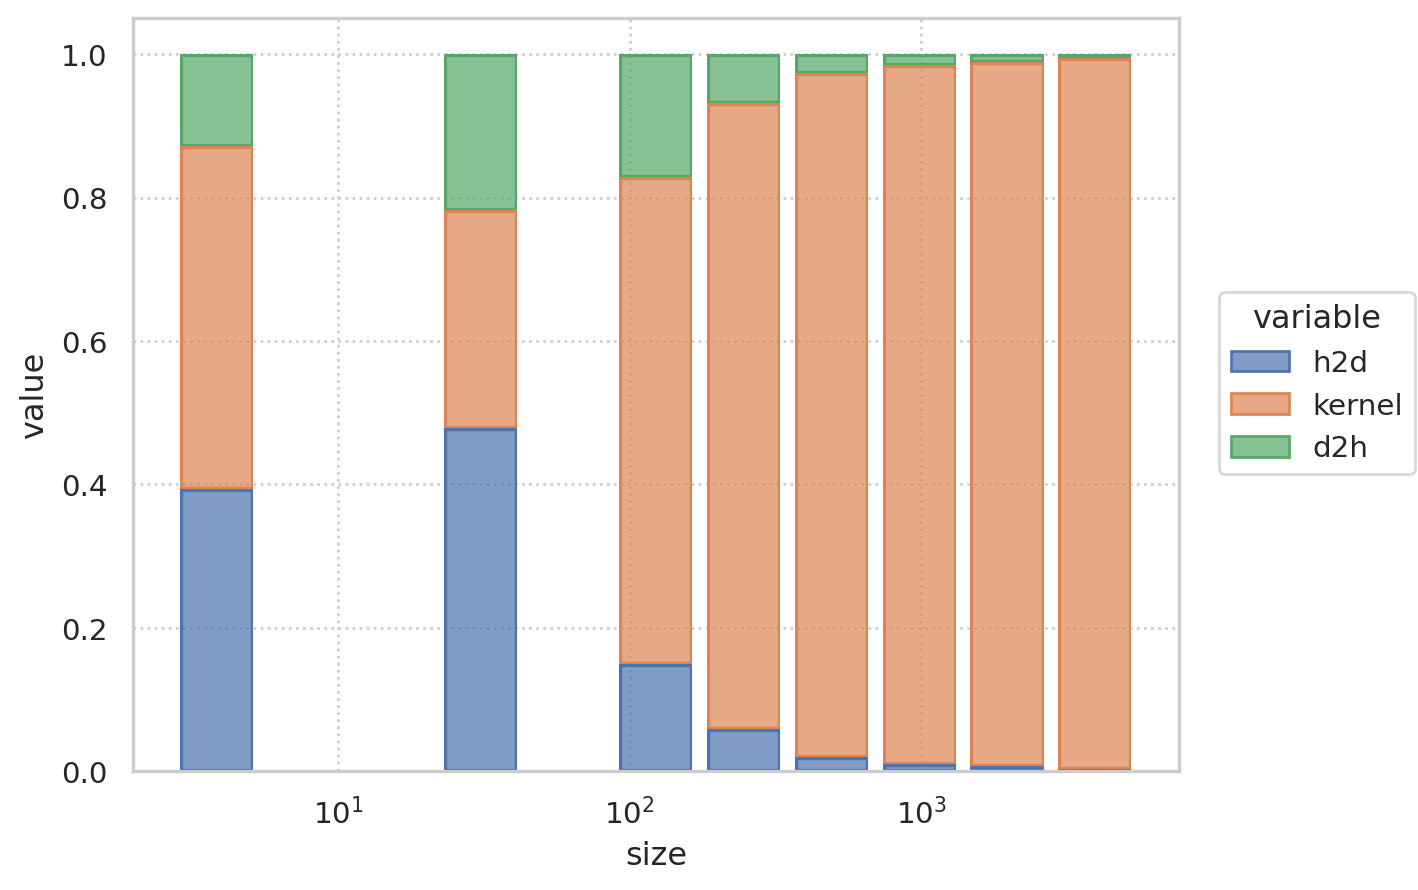

In [ ]:
df = pandas.DataFrame.from_records(rows_double, columns=('size', 'opish', 'kernel', 'h2d', 'd2h', 'total'))
df = df.melt(id_vars=['size', 'opish', 'total'], value_vars=['h2d', 'kernel', 'd2h'])
so.Plot(df, x='size', y='value', color='variable').scale(x='log').add(so.Bar(), so.Stack()).theme({**seaborn.axes_style("whitegrid"), "grid.linestyle": ":"})

/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


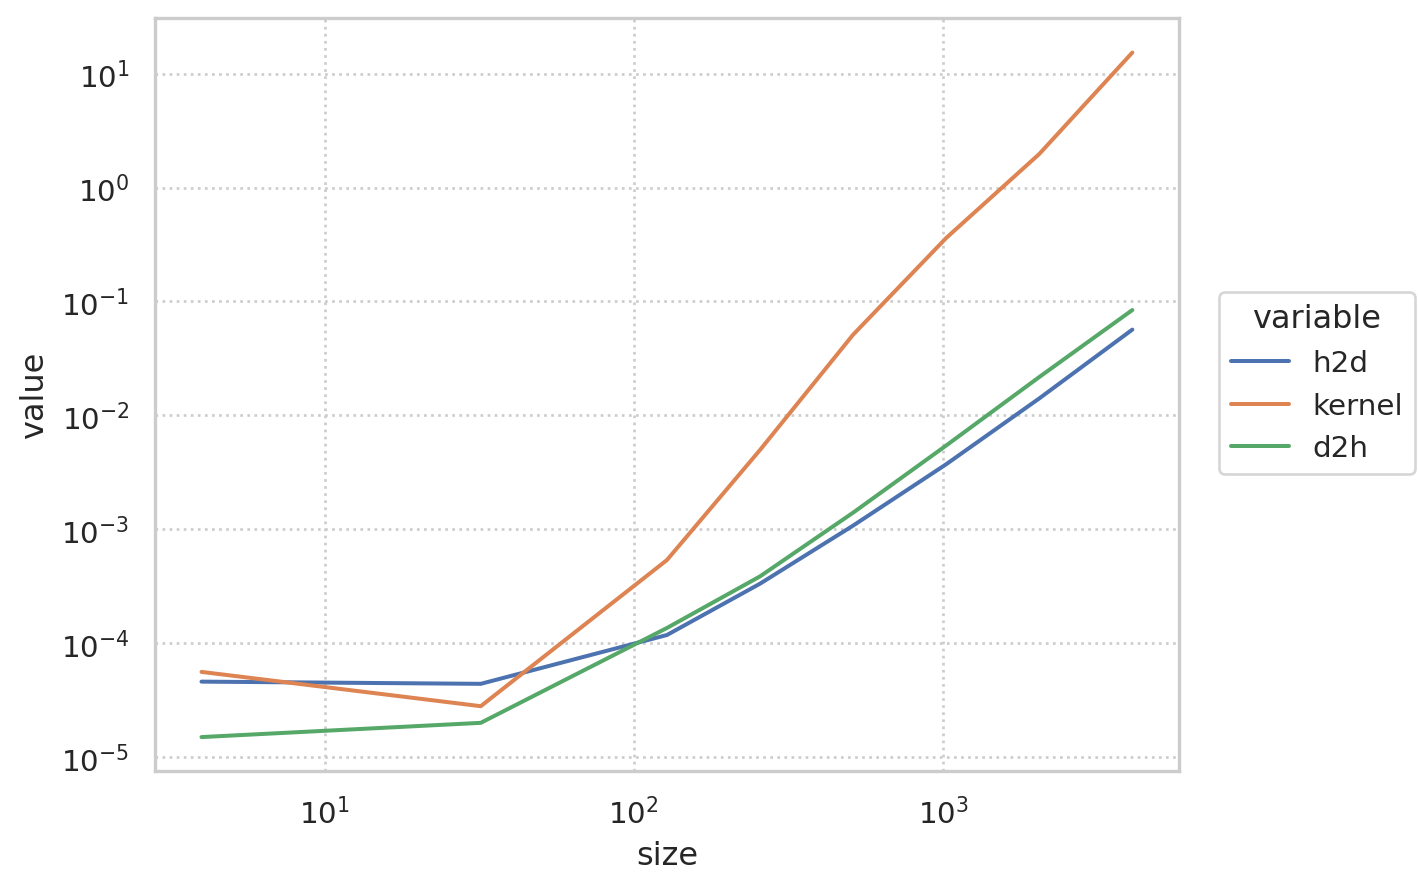

In [ ]:
df.value *= df.total
so.Plot(df, x='size', y='value', color='variable').scale(x='log', y='log').add(so.Line()).theme({**seaborn.axes_style("whitegrid"), "grid.linestyle": ":"})

In [ ]:
rows_single = []
for s in S:
  p = subprocess.run(f'./time_double.out {s} {s} {s}', shell=True, capture_output=True)
  txt = p.stdout.decode('utf-8')
  lines = txt.strip().split('\n')[2:]
  values = [float(l.split(':')[1].strip()) for l in lines]

  h2d = values[0]
  kernel = values[1]
  d2h = values[2]
  total = h2d + kernel + d2h
  h2d /= total
  kernel /= total
  d2h /= total
  rows_single.append([s, s**3, kernel, h2d, d2h, total])

/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


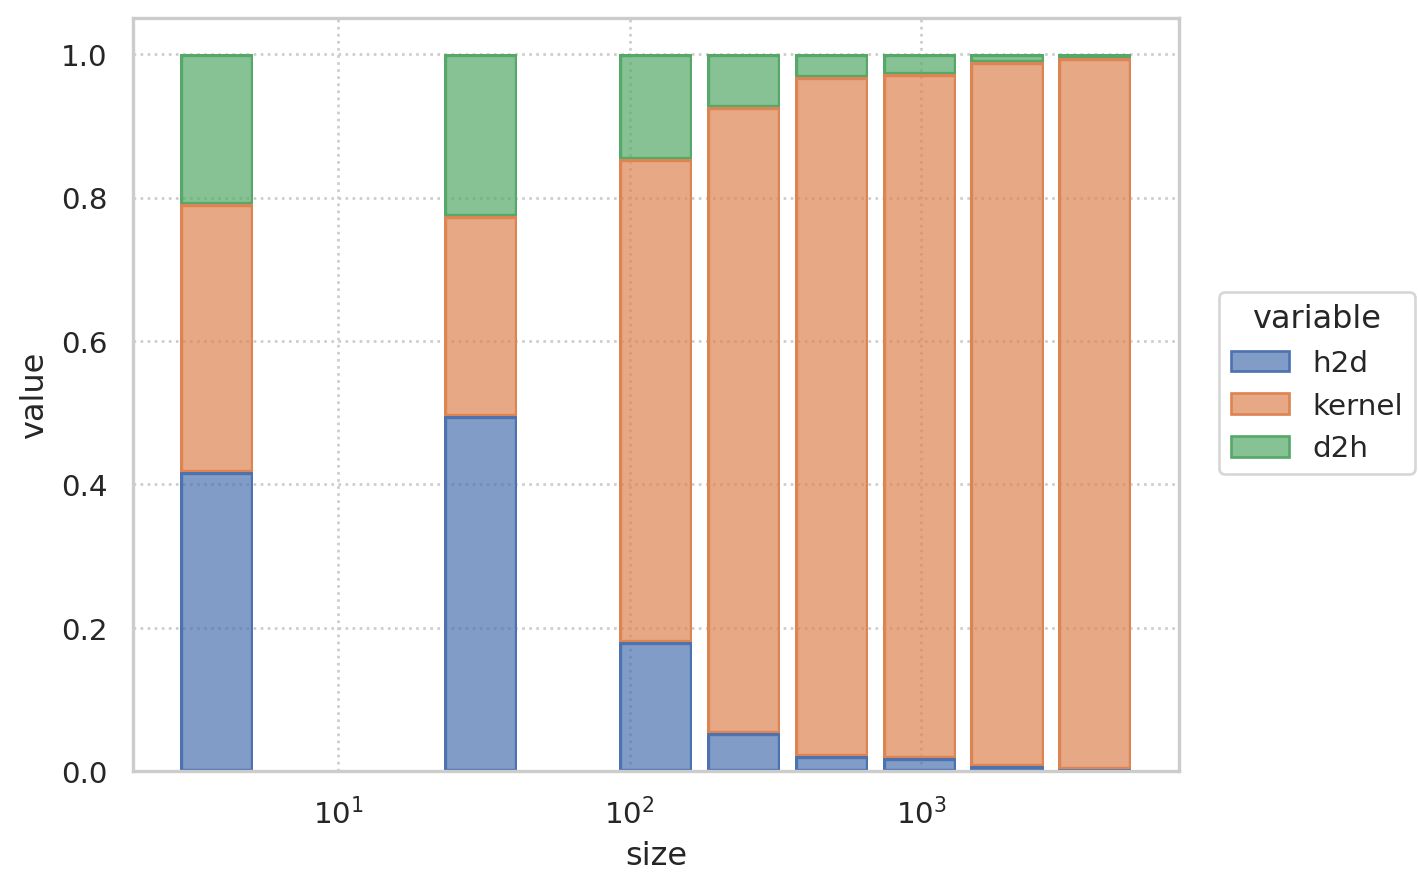

In [ ]:
df = pandas.DataFrame.from_records(rows_single, columns=('size', 'opish', 'kernel', 'h2d', 'd2h', 'total'))
df = df.melt(id_vars=['size', 'opish'], value_vars=['h2d', 'kernel', 'd2h'])
so.Plot(df, x='size', y='value', color='variable').scale(x='log').add(so.Bar(), so.Stack()).theme({**seaborn.axes_style("whitegrid"), "grid.linestyle": ":"})

In [ ]:
!nvcc -arch=sm_61 DD2360HT22/hw_3/ex_3/lab3_ex3.cu -o e3.out

In [ ]:
!./e3.out 100000

The input length is 100000
binning: B: 98 TPB: 1024
converting: B: 128 TPB: 32


In [ ]:
!./e3.out 1024

The input length is 1024
binning: B: 1 TPB: 1024
converting: B: 128 TPB: 32


In [ ]:
!ncu ./e3.out 1024

The input length is 1024
==PROF== Connected to process 875 (/content/e3.out)
binning: B: 1 TPB: 1024
==PROF== Profiling "kernel1" - 1: 0%....50%....100% - 8 passes
converting: B: 128 TPB: 32
==PROF== Profiling "convert_kernel" - 2: 0%....50%....100% - 8 passes
==PROF== Disconnected from process 875
[875] e3.out@127.0.0.1
  kernel1(unsigned int*, unsigned int*, unsigned int, unsigned int), 2022-Dec-08 19:50:43, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           4.86
    SM Frequency                                                             cycle/usecond                         569.08
    Elapsed Cycles                                                                   cycle                          5,101
    Memory [%]                                

In [ ]:
!nvcc -arch=sm_61 DD2360HT22/hw_3/ex_3/lab3_ex3.cu -DSTRIDE=1 -o k1_1.out
!nvcc -arch=sm_61 DD2360HT22/hw_3/ex_3/lab3_ex3.cu -DSTRIDE=8 -o k1_8.out
!nvcc -arch=sm_61 DD2360HT22/hw_3/ex_3/lab3_ex3.cu -DSTRIDE=16 -o k1_16.out

!nvcc -arch=sm_61 DD2360HT22/hw_3/ex_3/lab3_ex3.cu -DSTRIDE=1 -DALTERNATIVE_KERNEL -o k2_1.out
!nvcc -arch=sm_61 DD2360HT22/hw_3/ex_3/lab3_ex3.cu -DSTRIDE=8 -DALTERNATIVE_KERNEL -o k2_8.out
!nvcc -arch=sm_61 DD2360HT22/hw_3/ex_3/lab3_ex3.cu -DSTRIDE=16 -DALTERNATIVE_KERNEL -o k2_16.out

In [ ]:


!nvcc -arch=sm_61 DD2360HT22/hw_3/ex_3/lab3_ex3.cu -DSTRIDE=32 -o k1_32.out -DOUTPUT -DVERBOSE
!nvcc -arch=sm_61 DD2360HT22/hw_3/ex_3/lab3_ex3.cu -DSTRIDE=32 -o k1_32_silent.out

In [ ]:

!ncu k1_1.out 1024

==PROF== Connected to process 528 (/content/k1_1.out)
==PROF== Profiling "kernel1" - 1: 0%....50%....100% - 8 passes
==PROF== Profiling "convert_kernel" - 2: 0%....50%....100% - 8 passes
==PROF== Disconnected from process 528
[528] k1_1.out@127.0.0.1
  kernel1(unsigned int*, unsigned int*, unsigned int, unsigned int), 2022-Dec-09 13:54:42, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           4.94
    SM Frequency                                                             cycle/usecond                         577.92
    Elapsed Cycles                                                                   cycle                          5,271
    Memory [%]                                                                           %                           1

In [ ]:

!ncu k1_32_silent.out 1024

==PROF== Connected to process 279 (/content/k1_32_silent.out)
==PROF== Profiling "kernel1" - 1: 0%....50%....100% - 8 passes
==PROF== Profiling "convert_kernel" - 2: 0%....50%....100% - 8 passes
==PROF== Disconnected from process 279
[279] k1_32_silent.out@127.0.0.1
  kernel1(unsigned int*, unsigned int*, unsigned int, unsigned int), 2022-Dec-09 13:51:13, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           4.84
    SM Frequency                                                             cycle/usecond                         568.42
    Elapsed Cycles                                                                   cycle                          5,203
    Memory [%]                                                                           %            

In [ ]:
!ncu k1_1.out 100000

==PROF== Connected to process 616 (/content/k1_1.out)
==PROF== Profiling "kernel1" - 1: 0%....50%....100% - 8 passes
==PROF== Profiling "convert_kernel" - 2: 0%....50%....100% - 8 passes
==PROF== Disconnected from process 616
[616] k1_1.out@127.0.0.1
  kernel1(unsigned int*, unsigned int*, unsigned int, unsigned int), 2022-Dec-09 09:23:44, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           4.94
    SM Frequency                                                             cycle/usecond                         578.81
    Elapsed Cycles                                                                   cycle                         17,955
    Memory [%]                                                                           %                          20

In [ ]:
!ncu k1_8.out 100000

==PROF== Connected to process 638 (/content/k1_8.out)
==PROF== Profiling "kernel1" - 1: 0%....50%....100% - 8 passes
==PROF== Profiling "convert_kernel" - 2: 0%....50%....100% - 8 passes
==PROF== Disconnected from process 638
[638] k1_8.out@127.0.0.1
  kernel1(unsigned int*, unsigned int*, unsigned int, unsigned int), 2022-Dec-09 09:23:46, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           4.98
    SM Frequency                                                             cycle/usecond                         584.10
    Elapsed Cycles                                                                   cycle                          8,978
    Memory [%]                                                                           %                          11

In [ ]:
!ncu k1_16.out 100000

==PROF== Connected to process 658 (/content/k1_16.out)
==PROF== Profiling "kernel1" - 1: 0%....50%....100% - 8 passes
==PROF== Profiling "convert_kernel" - 2: 0%....50%....100% - 8 passes
==PROF== Disconnected from process 658
[658] k1_16.out@127.0.0.1
  kernel1(unsigned int*, unsigned int*, unsigned int, unsigned int), 2022-Dec-09 09:23:49, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           4.92
    SM Frequency                                                             cycle/usecond                         574.55
    Elapsed Cycles                                                                   cycle                         11,786
    Memory [%]                                                                           %                          

In [ ]:
!ncu k2_1.out 1024

==PROF== Connected to process 482 (/content/k2_1.out)
==PROF== Profiling "kernel2" - 1: 0%....50%....100% - 8 passes
==PROF== Profiling "convert_kernel" - 2: 0%....50%....100% - 8 passes
==PROF== Disconnected from process 482
[482] k2_1.out@127.0.0.1
  kernel2(unsigned int*, unsigned int*, unsigned int, unsigned int), 2022-Dec-09 09:18:14, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           5.00
    SM Frequency                                                             cycle/usecond                         584.95
    Elapsed Cycles                                                                   cycle                        683,110
    Memory [%]                                                                           %                          32

In [ ]:
!./k1_32.out 100000

The input length is 100000
stride: 32
binning: B: 4 TPB: 1024
converting: B: 128 TPB: 32
21 31 34 20 23 15 23 23 27 29 19 24 27 22 25 21 34 26 22 23 29 31 29 33 31 28 26 22 20 28 30 22 17 33 16 35 16 26 18 19 12 26 27 26 32 21 23 22 23 29 28 17 22 20 22 30 26 24 24 23 21 18 25 23 25 28 31 26 28 24 20 20 20 28 23 17 24 15 25 24 25 37 26 35 24 29 20 24 26 22 17 19 31 25 29 13 31 19 19 23 20 21 26 30 32 24 14 39 21 23 21 32 20 36 28 26 22 20 30 16 18 31 27 21 29 26 20 23 25 14 30 17 29 14 29 17 30 22 21 24 27 21 24 28 19 23 21 19 9 28 21 35 28 25 22 30 21 20 30 36 22 29 23 29 22 25 24 36 37 23 27 32 27 27 36 25 25 21 29 23 23 33 21 23 28 24 18 20 26 19 31 32 25 24 12 18 29 26 19 27 20 17 22 28 24 26 37 26 16 18 31 23 25 27 32 26 30 29 27 26 35 29 23 20 32 19 31 29 18 34 26 18 30 21 23 19 16 36 30 20 20 32 20 21 22 35 18 39 25 27 25 27 28 18 24 30 36 30 20 22 34 34 19 31 18 15 20 24 12 27 20 31 35 23 18 31 23 21 19 28 30 25 18 21 29 29 25 26 26 19 27 20 26 31 24 19 15 17 16 21 20 19 18 21 

In [ ]:
vals = "21 31 34 20 23 15 23 23 27 29 19 24 27 22 25 21 34 26 22 23 29 31 29 33 31 28 26 22 20 28 30 22 17 33 16 35 16 26 18 19 12 26 27 26 32 21 23 22 23 29 28 17 22 20 22 30 26 24 24 23 21 18 25 23 25 28 31 26 28 24 20 20 20 28 23 17 24 15 25 24 25 37 26 35 24 29 20 24 26 22 17 19 31 25 29 13 31 19 19 23 20 21 26 30 32 24 14 39 21 23 21 32 20 36 28 26 22 20 30 16 18 31 27 21 29 26 20 23 25 14 30 17 29 14 29 17 30 22 21 24 27 21 24 28 19 23 21 19 9 28 21 35 28 25 22 30 21 20 30 36 22 29 23 29 22 25 24 36 37 23 27 32 27 27 36 25 25 21 29 23 23 33 21 23 28 24 18 20 26 19 31 32 25 24 12 18 29 26 19 27 20 17 22 28 24 26 37 26 16 18 31 23 25 27 32 26 30 29 27 26 35 29 23 20 32 19 31 29 18 34 26 18 30 21 23 19 16 36 30 20 20 32 20 21 22 35 18 39 25 27 25 27 28 18 24 30 36 30 20 22 34 34 19 31 18 15 20 24 12 27 20 31 35 23 18 31 23 21 19 28 30 25 18 21 29 29 25 26 26 19 27 20 26 31 24 19 15 17 16 21 20 19 18 21 19 22 26 18 18 26 25 21 18 34 34 23 20 26 30 28 31 22 21 22 31 21 31 17 28 28 19 29 25 20 29 27 26 25 28 16 23 26 25 15 26 23 20 27 16 22 29 23 31 26 28 29 18 22 21 26 27 25 22 14 26 26 28 25 27 23 25 24 16 19 21 23 31 31 17 18 27 24 23 30 21 20 22 24 29 28 31 24 25 26 10 32 31 21 22 22 27 19 31 28 20 23 31 32 27 28 12 13 11 29 27 17 19 28 26 26 22 34 21 28 40 33 24 27 19 19 23 23 20 22 20 27 27 22 24 23 24 30 33 22 34 27 34 31 28 22 22 24 21 28 20 27 26 20 44 22 24 32 23 27 25 30 20 23 23 26 31 26 24 22 21 24 18 23 32 20 30 28 22 21 31 24 23 18 31 19 23 20 22 23 32 22 26 16 17 27 21 28 15 22 21 25 18 25 22 21 19 19 24 29 24 16 23 20 25 31 25 25 32 20 29 25 27 29 20 33 19 24 29 21 21 32 26 18 21 26 33 24 23 30 23 34 32 21 27 29 25 31 23 21 21 16 29 23 26 23 23 26 29 25 21 25 26 28 25 17 22 20 21 21 22 27 27 25 31 16 19 38 20 28 16 15 29 33 19 30 27 26 15 21 29 31 17 24 26 20 28 23 28 21 30 24 25 27 24 23 25 21 28 25 22 26 30 24 20 26 25 19 17 17 28 29 29 34 21 30 25 21 28 18 28 30 31 19 24 25 38 26 31 22 25 27 27 16 26 19 22 31 28 24 29 22 33 30 19 26 32 22 31 23 25 27 25 17 26 30 19 17 32 23 16 22 24 22 35 26 30 28 16 22 28 32 22 27 23 29 23 24 34 28 28 23 29 31 17 19 28 29 28 29 16 22 16 19 26 24 27 27 24 18 19 16 31 20 37 19 18 21 20 30 24 27 29 24 22 21 25 20 25 27 21 23 30 22 16 28 17 29 20 26 23 28 23 29 22 30 24 23 26 24 20 21 24 22 15 27 25 19 21 27 28 30 12 37 30 30 19 25 23 24 30 27 20 20 20 26 30 21 29 15 27 19 31 15 28 28 19 24 25 20 27 25 35 32 21 15 23 24 26 32 20 29 26 16 24 24 20 17 26 23 28 23 30 29 16 25 28 18 25 17 27 27 19 35 32 21 18 18 27 14 28 18 21 24 20 25 30 19 24 32 22 29 23 26 27 24 21 30 26 20 31 25 25 22 33 22 21 27 18 26 28 30 22 29 26 27 26 29 12 21 22 30 24 19 26 25 29 18 21 24 29 29 26 23 25 22 22 19 25 20 22 17 28 19 29 19 20 24 19 21 20 23 30 22 13 24 31 17 19 30 20 28 21 27 24 33 22 24 20 31 38 22 29 22 24 26 16 26 17 33 27 18 23 25 26 21 26 24 25 24 25 28 25 21 18 30 23 26 24 22 18 31 31 31 25 31 18 22 24 29 27 28 23 38 16 23 26 27 19 31 28 35 24 16 25 23 24 24 23 25 21 26 21 22 25 26 28 19 27 26 31 32 18 22 17 22 21 25 28 29 24 25 23 23 32 23 21 26 25 27 30 24 25 26 26 22 21 27 17 25 22 24 30 16 24 24 22 18 23 23 23 21 32 22 20 30 21 18 17 32 20 23 23 24 26 26 29 29 24 20 20 31 23 21 30 26 25 22 16 23 28 29 21 31 17 28 30 21 24 26 24 32 29 31 32 33 26 21 21 29 24 27 23 26 30 26 22 27 28 18 29 29 18 14 19 26 31 20 28 31 24 26 24 14 21 13 24 22 23 20 21 20 30 19 23 23 27 18 15 15 38 26 26 21 27 35 24 29 26 24 17 28 23 23 21 25 21 14 33 29 23 26 30 25 20 17 28 24 24 29 22 20 23 28 24 18 17 24 20 28 21 23 26 31 31 23 18 26 25 21 25 28 22 28 23 26 30 19 24 24 30 21 26 25 31 29 23 25 28 23 22 20 23 30 25 22 29 23 24 33 23 26 28 24 16 24 18 19 33 19 18 24 24 29 21 26 25 27 16 23 23 25 24 25 22 29 26 25 22 22 22 31 39 25 26 28 19 25 21 25 19 21 28 18 32 22 20 34 26 23 13 19 24 28 29 38 25 27 29 22 29 21 23 18 21 33 23 23 25 25 27 26 17 25 23 26 23 26 26 22 32 32 30 30 29 19 27 28 25 22 30 24 20 21 27 26 24 23 24 19 33 25 25 25 22 18 22 17 26 21 31 30 33 24 19 17 26 31 22 26 24 24 18 23 32 23 27 21 28 32 23 29 34 31 25 29 22 20 26 27 25 30 28 24 23 20 32 19 26 26 19 29 39 17 23 27 16 19 21 30 24 26 24 15 25 15 26 23 22 40 23 27 27 15 29 26 28 31 14 27 25 23 23 26 28 23 30 17 20 27 23 22 24 23 21 25 28 26 20 18 28 35 25 22 23 17 33 26 23 26 22 27 19 23 23 23 22 30 18 26 14 18 28 24 30 12 30 21 35 27 15 21 24 23 19 32 22 18 26 17 27 20 32 24 24 26 20 26 20 25 18 24 28 19 25 22 26 24 21 26 21 26 20 21 23 26 27 30 21 27 19 19 29 31 33 19 24 16 19 28 25 21 24 27 22 35 28 20 28 21 29 25 18 29 30 20 28 26 19 20 18 25 26 32 34 22 27 27 27 16 20 17 23 15 27 20 20 34 30 27 23 24 22 22 28 25 31 22 28 24 21 31 21 24 25 35 30 15 21 18 26 17 28 22 27 24 14 24 19 24 28 26 18 18 26 30 23 23 24 30 21 36 24 27 23 25 20 17 25 21 25 20 26 26 23 19 22 26 26 29 16 28 22 18 25 24 23 21 28 32 21 18 33 18 22 22 18 26 24 28 14 33 21 29 17 32 28 14 36 15 26 26 21 30 28 27 20 20 28 13 21 20 18 28 30 27 26 16 35 21 21 30 28 24 19 21 26 22 32 25 35 35 19 20 28 22 23 22 24 24 25 16 29 31 27 18 27 23 22 31 27 20 18 34 28 23 39 23 23 21 20 27 26 21 20 27 20 21 16 28 29 25 29 26 29 18 24 32 27 21 26 20 23 30 18 19 26 25 34 20 15 26 29 19 23 19 23 37 28 17 26 24 28 16 29 25 17 26 26 26 16 33 20 20 23 26 34 21 30 12 22 18 23 28 18 22 31 37 35 24 33 24 25 26 26 22 22 25 31 23 21 25 21 26 24 28 21 25 26 21 32 28 23 23 34 31 27 30 26 31 22 27 20 28 18 18 19 26 18 31 30 25 23 20 28 21 15 17 24 26 30 23 33 23 23 27 22 23 29 29 20 23 22 24 21 33 22 21 24 27 20 29 21 22 22 28 23 31 30 27 19 22 25 21 18 20 24 19 30 22 33 23 22 22 26 29 23 21 22 21 24 27 14 21 23 18 20 28 18 21 21 22 14 30 31 18 27 27 25 27 20 23 31 32 25 28 16 22 24 26 23 23 27 21 25 22 23 21 27 33 23 31 25 29 19 31 20 25 25 20 27 26 18 27 26 38 25 22 21 22 22 27 16 36 23 33 26 21 22 23 18 20 19 23 14 31 21 30 29 37 24 27 17 27 21 20 29 17 27 13 15 27 29 25 23 23 28 13 28 30 32 24 20 21 15 25 16 25 28 20 26 21 28 28 20 20 17 28 24 21 36 29 16 25 21 26 19 21 26 21 21 25 25 34 24 32 32 22 22 16 27 31 28 23 23 27 22 25 23 23 18 21 25 20 18 36 21 20 18 31 26 21 27 27 28 30 22 29 20 34 33 23 25 22 23 22 23 25 16 24 17 40 28 15 26 24 21 21 19 27 26 21 31 19 28 26 18 13 28 23 25 20 26 24 28 22 26 27 25 26 27 20 25 34 29 33 30 35 28 24 25 33 26 26 25 26 24 23 20 22 29 20 16 23 27 22 28 26 19 30 30 19 24 23 27 18 25 25 21 32 35 26 24 24 21 14 26 27 18 24 24 23 17 18 19 29 25 23 28 31 18 22 21 20 22 20 28 17 28 20 33 19 25 24 19 25 26 22 23 21 27 25 31 25 20 18 25 13 25 26 31 26 28 33 33 25 23 23 22 27 37 20 24 21 24 26 22 23 23 20 32 22 22 21 21 25 17 26 27 32 18 17 31 20 22 24 21 22 16 25 23 27 22 32 22 23 27 39 35 22 26 25 23 33 27 22 28 27 28 23 29 19 27 17 28 24 28 19 27 18 32 29 23 21 19 24 22 19 22 37 24 28 35 21 21 22 19 24 22 24 28 17 29 21 18 21 26 22 26 32 29 17 20 18 24 24 19 22 26 18 21 20 20 20 31 34 19 23 24 15 19 33 27 26 20 23 20 28 17 19 28 25 18 29 36 26 21 28 21 27 19 28 27 24 20 30 22 33 26 29 23 16 27 29 25 28 12 26 25 28 18 19 34 19 26 29 23 23 36 18 30 24 20 19 20 28 29 27 24 19 24 30 30 27 19 23 19 17 19 30 24 22 35 33 32 34 33 26 19 31 26 32 22 23 14 29 23 23 34 14 22 23 32 17 19 24 26 29 20 29 19 21 35 26 23 28 25 29 25 19 19 16 24 41 27 28 24 23 29 24 24 16 22 18 23 24 31 21 31 28 20 21 25 22 20 33 22 23 27 29 25 20 33 25 19 12 16 24 29 26 23 19 27 32 22 17 22 17 20 27 26 22 21 30 27 21 20 23 23 21 16 15 36 30 19 14 26 29 30 25 34 22 18 18 22 35 18 28 29 27 27 17 25 25 19 20 22 22 18 24 12 25 28 25 18 30 22 14 18 19 27 23 35 27 26 17 27 22 22 27 26 15 25 25 17 23 22 29 24 23 23 28 30 29 24 25 22 27 26 23 20 21 18 26 25 17 22 24 28 26 24 26 23 23 28 27 16 18 29 19 26 26 18 16 22 24 22 21 27 26 27 33 24 30 22 9 25 25 31 27 28 19 24 26 27 28 18 22 20 28 24 24 17 19 17 29 30 22 22 26 19 25 25 31 21 21 26 24 24 33 27 22 17 25 31 30 21 28 19 17 13 23 20 29 23 39 23 26 34 19 11 36 28 24 24 19 20 31 24 28 22 23 20 21 25 22 24 27 36 22 34 20 28 30 36 27 30 16 28 19 24 29 11 26 25 30 26 20 31 28 29 23 30 18 19 20 20 25 18 22 20 23 25 31 21 26 17 19 21 24 21 19 24 20 19 26 23 24 28 24 18 24 30 30 32 25 28 25 22 20 24 20 20 20 24 26 24 23 27 30 30 17 16 17 34 29 25 28 33 26 24 32 22 22 25 24 29 22 22 40 15 26 20 17 26 29 21 29 16 28 20 27 25 22 27 27 24 20 28 21 27 29 28 20 39 25 22 26 26 20 27 28 18 19 13 23 30 34 20 25 24 16 26 28 21 23 31 31 30 23 24 26 19 31 25 27 32 31 24 26 20 27 31 24 25 22 24 28 25 23 28 19 24 18 28 23 30 19 34 29 28 14 23 27 22 21 20 28 22 25 20 23 21 30 30 29 19 26 22 25 20 25 17 29 19 19 26 30 26 26 23 22 20 31 27 33 26 30 28 26 35 19 19 21 25 23 24 23 24 21 28 29 16 23 23 18 26 23 23 27 29 24 24 24 24 30 19 30 24 23 18 23 28 32 19 31 34 23 22 19 21 21 27 22 21 21 21 24 24 25 23 22 21 31 34 36 34 29 21 22 35 28 11 25 27 30 23 24 21 30 21 15 23 29 19 34 30 32 24 27 32 31 19 22 17 25 27 28 21 25 23 23 27 24 28 24 22 29 27 31 18 21 25 22 32 25 34 22 24 26 21 20 27 24 20 21 25 22 29 19 20 24 20 23 20 29 26 32 19 25 30 37 26 18 33 26 27 28 30 28 14 22 17 12 33 26 20 16 20 31 29 27 22 26 24 23 27 30 30 31 24 30 26 25 29 27 27 26 15 20 32 21 15 19 20 17 19 21 21 28 18 18 20 24 15 28 28 32 19 24 24 21 26 19 29 17 19 21 23 26 25 25 21 27 19 30 22 18 26 26 16 30 25 35 25 23 21 19 28 21 30 26 18 28 17 19 22 39 27 25 29 30 26 22 24 25 23 22 25 18 27 24 22 29 29 23 33 24 17 22 28 36 22 22 19 17 29 17 27 20 16 28 32 23 19 23 26 26 20 29 34 31 23 21 19 29 22 26 34 36 18 33 24 32 23 19 24 34 24 18 29 23 33 29 19 23 24 13 23 21 18 24 28 25 28 22 25 24 19 26 31 27 26 26 31 23 18 27 26 25 28 19 36 22 29 25 23 21 28 19 20 26 23 18 29 20 21 20 15 26 20 27 23 21 28 30 24 27 23 22 20 23 26 22 18 21 22 38 24 24 20 16 23 28 31 28 25 20 26 24 17 16 29 21 19 22 19 20 26 27 21 24 24 28 31 19 21 28 23 30 19 26 27 20 25 24 23 31 27 28 27 22 20 27 24 23 32 33 28 25 22 23 17 25 22 20 26 29 19 25 21 30 28 26 22 29 21 32 22 24 19 31 21 24 31 28 22 19 13 32 27 18 28 22 26 32 18 30 24 36 26 24 21 25 18 25 20 22 21 16 27 27 14 21 27 24 27 19 30 21 15 21 20 21 22 28 17 22 23 24 22 15 23 12 22 26 31 19 22 25 29 33 31 25 32 28 25 26 25 21 26 17 26 20 16 25 30 19 23 27 23 16 22 23 28 23 22 19 24 26 30 25 20 23 25 23 23 30 22 24 18 25 21 22 30 26 32 23 19 21 21 20 18 27 29 21 22 18 30 22 24 22 32 19 22 32 21 14 35 25 30 21 25 27 28 29 26 34 23 19 32 32 22 18 26 19 26 19 32 26 27 24 19 18 27 26 20 33 24 35 21 24 30 30 27 26 24 28 19 27 22 25 21 30 20 18 24 30 21 26 25 32 21 31 28 24 30 24 20 32 19 28 23 27 22 23 24 30 23 30 24 20 23 31 22 26 25 29 23 24 35 22 19 19 26 23 30 16 27 26 25 20 17 26 28 32 22 23 33 18 24 23 15 22 20 25 24 22 29 29 19 24 21 33 28 25 26 29 22 27 27 27 25 26 24 20 23 24 22 21 17 21 18 20 26 28 29 17 13 24 27 19 21 27 28 31 23 23 26 30 18 28 17 23 17 27 29 23 34 25 25 26 33 23 21 23 21 20 27 21 30 29 19 21 29 20 23 25 21 29 29 23 27 22 22 22 27 23 21 22 21 23 31 18 22 26 22 24 18 31 26 29 18 23 24 32 25 28 27 29 19 22 26 21 22 32 31 25 29 23 20 22 24 25 26 24 28 24 28 27 20 27 14 17 24 30 29 29 23 16 34 29 33 18 26 22 25 20 30 24 21 22 19 28 22 20 28 25 26 25 28 30 19 24 20 26 31 22 29 26 31 26 23 27 20 28 22 19 30 28 14 29 24 25 17 29 26 29 14 30 27 30 25 32 24 23 21 40 28 21 18 27 20 20 34 19 15 25 21 23 25 22 28 23 32 25 25 21 23 21 26 28 30 20 21 29 29 30 19 20 31 18 18 23 27 32 30 20 19 19 22 24 21 34 29 21 25 23 27 28 19 28 32 38 21 25 23 16 11 21 32 17 25 40 17 27 28 24 26 19 15 25 26 24 25 18 23 21 26 23 28 24 17 25 19 26 25 31 32 20 34 22 28 15 19 27 18 31 30 20 22 23 22 20 28 25 16 27 25 30 22 21 25 25 32 20 22 27 28 27 23 25 24 16 25 28 27 22 27 30 27 24 25 19 31 24 22 21 19 21 22 30 25 29 22 25 22 20 17 27 32 27 26 34 30 22 26 29 22 31 28 27 36 21 23 29 26 27 28 27 20 25 25 25 27 21 27 37 21 24 18 32 32 30 21 26 24 28 23 29 29 25 30 33 21 36 24 14 19 33 24 23 31 29 17 29 20 24 27 20 25 38 25 18 21 25 26 27 22 24 29 32 23 23 24 28 24 24 23 25 20 20 18 30 25 36 22 22 20 27 28 26 26 28 28 29 26 28 13 30 21 24 28 24 25 22 27 21 26 27 26 29 20 28 19 23 17 24 23 29 29 19 25 30 32 20 21 26 28 30 24 32 32 32 19 24 25 27 31 16 12 24 21 22 32 32 22 18 21 30 29 29 28 25 21 20 22 26 19 19 24 32 20 18 26 19 31 21 18 22 31 21 25 32 24 31 20 31 16 34 28 28 26 27 20 18 24 22 34 30 36 28 32 29 34 26 23 25 34 20 26 31 25 15 20 22 23 22 25 27 32 28 23 18 24 30 22 25 25 28 19 23 23 22 32 19 23 27 22 24 28 20 25 30 29 23 19 30 27 23 36 16 26 23 25 16 19 25 23 25 26 26 22 21 23 28 24 21 26 23 17 31"
vals = list(map(int, vals.split()))

In [ ]:

ys = vals
xs = list(range(len(ys)))

In [ ]:

import matplotlib.pyplot as plt

<BarContainer object of 4096 artists>

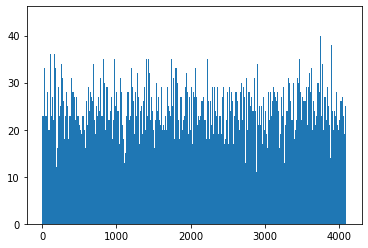

In [ ]:
#plt.figure(figsize=(8*3, 6*3, width=1), dpi=100)
plt.bar(xs, ys, width=1)

In [ ]:
min(vals)

9